# Process Mining
Please make sure your notebook fulfills the following requirements:
- Commented and structured code (if not, this will be penalized in the style points)
- Questions separated by markdown headers
- Top-to-bottom runnable cells to reproduce your results
- It should be runnable in the bundled conda environment.
- Ensure that the code in the notebook runs if placed in the same folder as all of the provided
files, delivering the same outputs as the ones you submit in the notebook and report on
in your report.
- DO NOT CLEAR THE OUTPUT of the notebooks you are submitting!

Also, please do not set any random states in this notebook. We set the following random seeds to ensure that the results are the same.

In [1]:
### Display
from IPython.display import display
## Data Handling
import pandas as pd
import pm4py
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import seaborn as sns

In [2]:
# please do not change or delete this cell
random.seed(42)
np.random.seed(42)

## Event Log Exploration
You have received event data of a financing organization's process of offering loans to customers whose application of a loan was accepted. In the event log, every entry describes the state change of an offer,i.e., every entry refers to: 1) the loan application of a customer (case), 2) the state an offer was set to (activity) and 3) a timestamp. Additionally, some additional information is provided for every offer, including the offer ID.

In the provided data, every case describes the process of coming to terms with the customers of accepted loan applications. Hence, every case can include the lifecycles of one or more offers, however, for every case no more than one offer is accepted.
Use Python and PM4PY (https://processintelligence.solutions/static/api/2.7.11/) to explore the event log.

In [3]:
# Check pm4py version
print(pm4py.__version__)

# Load the event log
df = pm4py.read_xes('event_log.xes')
display(df.head())
# use pm4py's reformatting help. It transforms the event log into the dataframe format.
log_obj = pm4py.format_dataframe(df, case_id='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp', timest_format="yyyy-mm-dd hh:mm:ss")


2.7.13


parsing log, completed traces ::   0%|          | 0/11021 [00:00<?, ?it/s]

,concept:name,time:timestamp,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID,case:LoanGoal,case:ApplicationType,case:concept:name,case:RequestedAmount
0,Create Offer,2016-01-02 14:45:25.611000+00:00,0.0,94.0,True,120.00,False,0.0,9000.0,NaN,"Other, see explanation",New credit,Application_387012864,5000.0
1,Created,2016-01-02 14:45:26.830000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_1750007091,"Other, see explanation",New credit,Application_387012864,5000.0
2,Sent (mail and online),2016-01-02 14:46:43.295000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_1750007091,"Other, see explanation",New credit,Application_387012864,5000.0
3,Cancelled,2016-02-02 07:00:36.975000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_1750007091,"Other, see explanation",New credit,Application_387012864,5000.0
4,Create Offer,2016-01-02 09:55:46.369000+00:00,6900.0,53.0,True,150.73,True,1021.0,6900.0,NaN,Car,New credit,Application_1120819670,6850.0


### Activities and Events
Please leave do not change the activities in the event log -- just leave them as they are in the data. Even if you suspect multiple activity names refer to the same actual activity.

(a) (1.5 points) You first turn your attention to the activities in the event log.

- Provide a plot showing the absolute frequency of activities. The x-axis should
show every activity name and the y-axis should show every activity’s absolute
frequency. Make sure to label your axes and provide a title for the plot.
- How many events does the log contain?

Hint: No need to combine any activities in the event log, just leave the activities as
they are.

'The number of total events equals to the length of the log 68312. The number of unique activities is 8'

C:\Users\Joost\AppData\Local\Temp\ipykernel_32256\211983639.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='concept:name', palette='Spectral', order=sorted_activites )


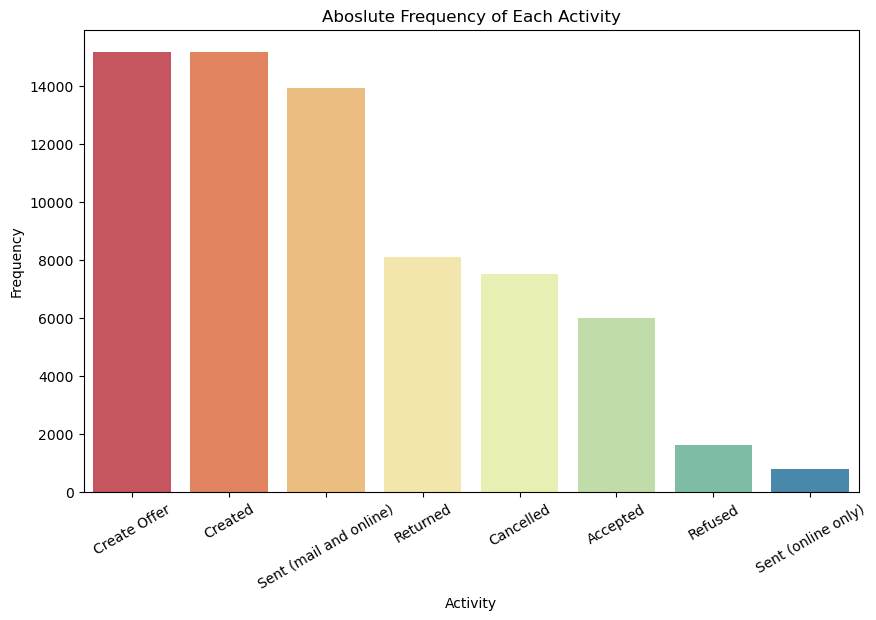

In [4]:
# number of events and plot showing the frequency of each activity

display(f"The number of total events equals to the length of the log {len(log_obj)}. The number of unique activities is {len(log_obj['concept:name'].unique())}")

sorted_activites = log_obj['concept:name'].value_counts().index

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='concept:name', palette='Spectral', order=sorted_activites )

plt.title('Aboslute Frequency of Each Activity')
plt.xlabel('Activity')
plt.ylabel('Frequency')
plt.xticks(rotation=30)
plt.show()

### Cases and Offers

(b) (1.5 points) Next, you want to look at the cases in the event log.
- How many cases are in the event log?
- What is the total number of offers made in the event log?
- Provide the mean number of offers per case.

In [5]:
# number of cases, offers and mean offers per case

# Create Series for unique cases and offers
cases = log_obj["case:concept:name"].value_counts()
offers = log_obj["OfferID"].value_counts()

# Account for NaN values
cases.dropna(inplace=True)
offers.dropna(inplace=True)

# Display the results
display(f"Number of cases {len(cases)}")
display(f"Number of offers {len(offers)}")
display(f"Average amount of offers{len(offers)/len(cases)}")

'Number of cases 11021'

'Number of offers 15188'

'Average amount of offers1.3780963614916977'

## Process Exploration

### Start and End Activities

(c) (1 point) You first look at the start and end activities of the process. Create a plot, showing how often every activity is a start and/or end activity of a case. Your plot should have all activity names on the x-axis and the absolute frequency of the activity being a start/end activity on the y-axis. Distinguish between start and end activities by color. Make sure to label your axes and provide a title for the plot.

In [6]:
# start and end activities of the process

# Get the amount of start and end activities 

start_activities = pm4py.get_start_activities(log_obj)
print('The start activities are:')
display(start_activities)
end_activities = pm4py.get_end_activities(log_obj)
print('The end activities are:')
display(end_activities)

The start activities are:


{'Create Offer': 11021}

The end activities are:


{'Cancelled': 5253,
 'Accepted': 4442,
 'Refused': 1293,
 'Returned': 16,
 'Sent (mail and online)': 15,
 'Sent (online only)': 2}

In [7]:
# Convert the dictionaries into DataFrames and add the 'Type' column
start_df = pd.DataFrame(list(start_activities.items()), columns=['Activity', 'Count'])
start_df['Type'] = 'Start'

end_df = pd.DataFrame(list(end_activities.items()), columns=['Activity', 'Count'])
end_df['Type'] = 'End'

# Combine the two DataFrames
combined_df = pd.concat([start_df, end_df], ignore_index=True)

display(combined_df)

,Activity,Count,Type
0,Create Offer,11021,Start
1,Cancelled,5253,End
2,Accepted,4442,End
3,Refused,1293,End
4,Returned,16,End
5,Sent (mail and online),15,End
6,Sent (online only),2,End


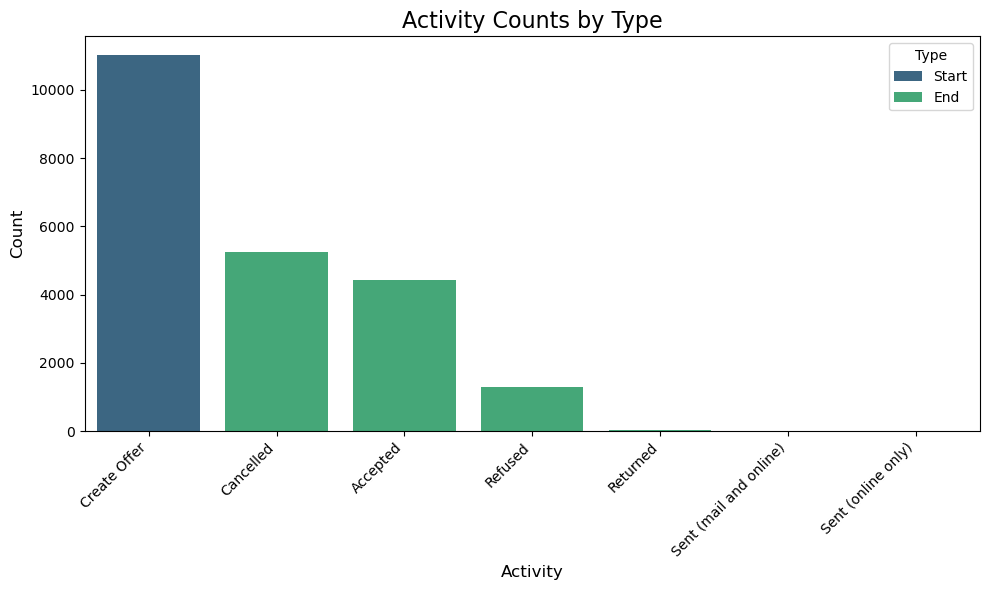

In [8]:
# plot of start and end activities

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df, x='Activity', y='Count', hue='Type', palette='viridis') # , log_scale=True) 

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add titles and labels
plt.title('Activity Counts by Type', fontsize=16)
plt.xlabel('Activity', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

### Full Process Model

To understand the process, you want to create a process model.

(d) (1 point) As learned in your IDS course, the Inductive Miner guarantees that the
language of the model includes all traces in the event log. Do not actively set any
parameters for the Inductive Miner, i.e., leave them at their default values and just
pass the event log. Provide a Petri net model obtained from applying the Inductive
Miner using the entire event log as input.

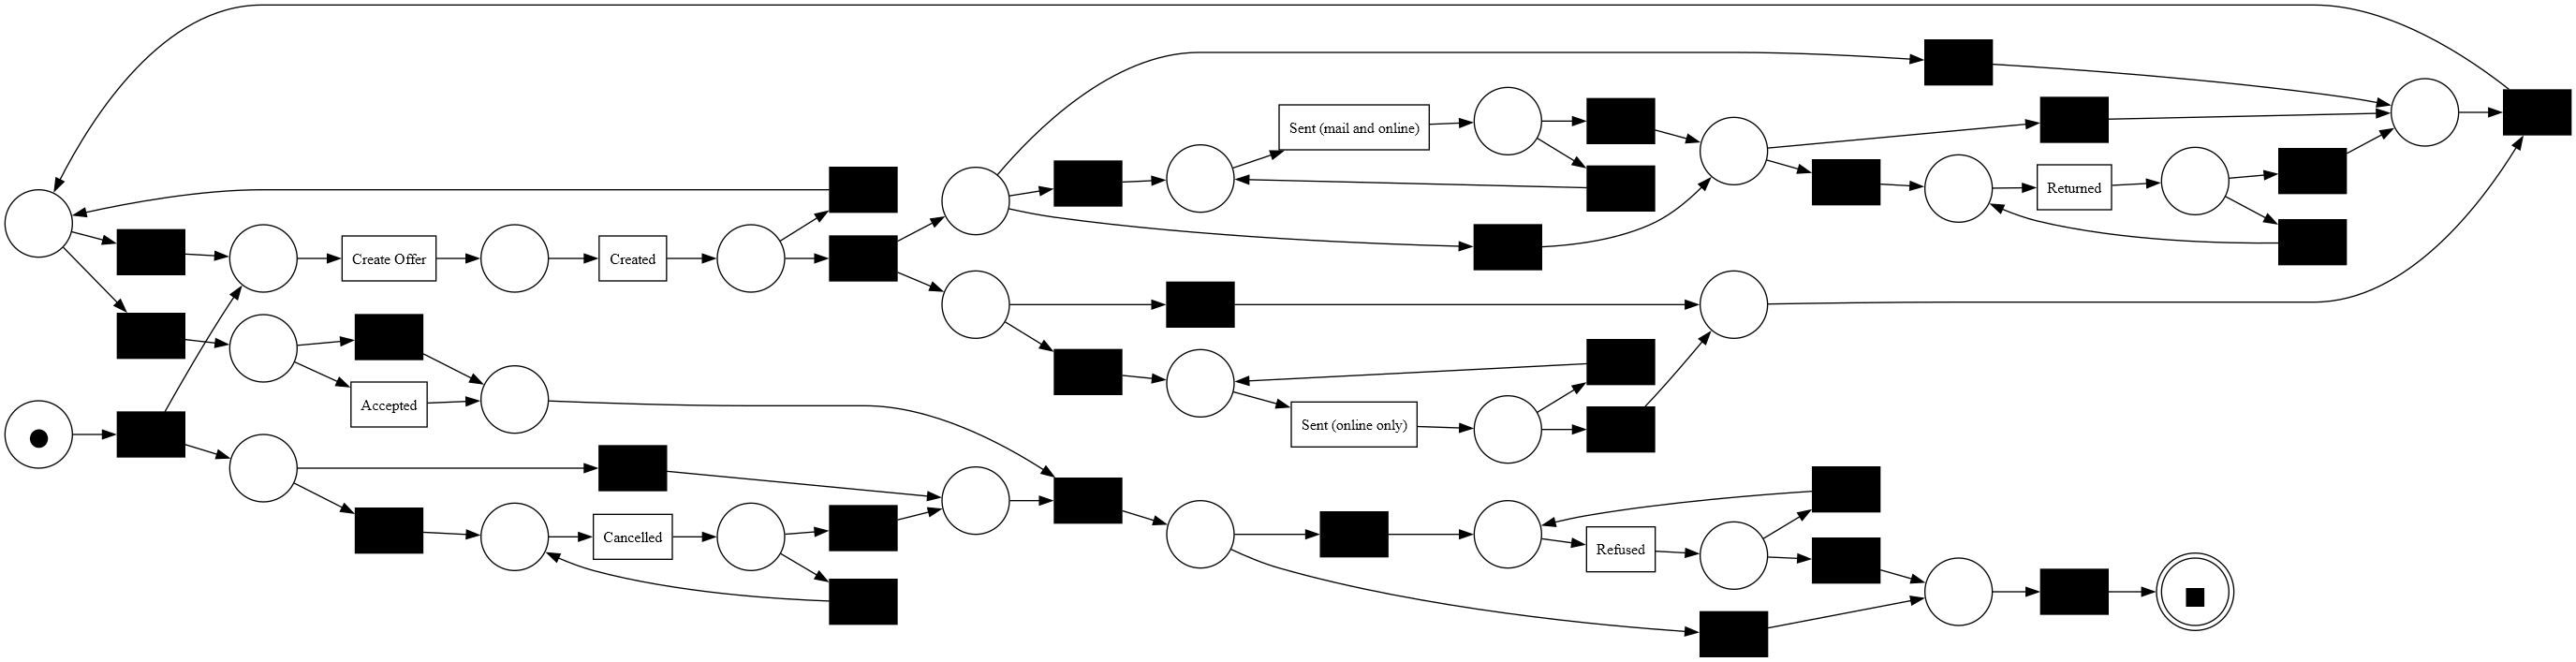

In [9]:
# Process Model full log

# The net, initial marking, and final marking
net, im, fm = pm4py.discover_petri_net_inductive(log_obj)

# Display the Petri net
pm4py.view_petri_net(petri_net=net, initial_marking=im, final_marking=fm) 

#### Model Language
(Sensible and Nonsensical Traces)

In [10]:
# in case you want to check something here, but no code required for this part

### Variants
Now you have understood the general nature of the process, you want to take a look at the
different variants present in the event log and the number of cases they represent.

(g) (1 point) Create a chart showing the percentage of cases that can be covered by
the minimum number of variants. The x-axis should show the number of variants
(ordered from left to right by their frequency) and the y-axis should depict the relative
accumulated number of cases. Make sure to label your axes and provide a title for the
plot.

Hint: To determine each variant’s value on the y-axis you need to sort the variants by
the number of cases they cover (descending) before determining the accumulated sum
of the percentage of cases covered. We also recommend adding a count of zero cases
for a non-existent 0th variant to make the plot more expressive.

In [11]:
# plot showing percentage of cases covered by number of variants

# Find all variants in 
variants = pm4py.get_variants_as_tuples(log_obj)

# sort by frequency & display the most frequent one
variants_sorted = sorted(variants.items(), key=lambda x: x[1], reverse=True)

num_cases = len(cases)
num_variants = len(variants_sorted)
display(num_variants)
variants_df = pd.DataFrame(variants_sorted)
variants_df.loc[-1] = ["()", 0]  # adding a row
variants_df.index = variants_df.index + 1  # shifting index
variants_df.sort_index(inplace=True)

variant_acc = 0
variants_df.rename(columns={0:"Traces", 1:"Occurences"}, inplace=True)
variants_df["Accumulated"] = variants_df["Occurences"].cumsum()

display(variants_df)

476

,Traces,Occurences,Accumulated
0,(),0,0
1,"(Create Offer, Created, Sent (mail and online)...",4150,4150
2,"(Create Offer, Created, Sent (mail and online)...",2491,6641
3,"(Create Offer, Created, Sent (mail and online)...",941,7582
4,"(Create Offer, Created, Sent (mail and online)...",419,8001
...,...,...,...
472,"(Create Offer, Created, Cancelled, Create Offe...",1,11017
473,"(Create Offer, Created, Sent (mail and online)...",1,11018
474,"(Create Offer, Created, Sent (online only), Ca...",1,11019
475,"(Create Offer, Created, Create Offer, Created,...",1,11020


minimum number of variants you need to cover 85% of cases

C:\Users\Joost\AppData\Local\Temp\ipykernel_32256\2110538481.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=variants_df, x=variants_df.index, y='Accumulated', palette='viridis')


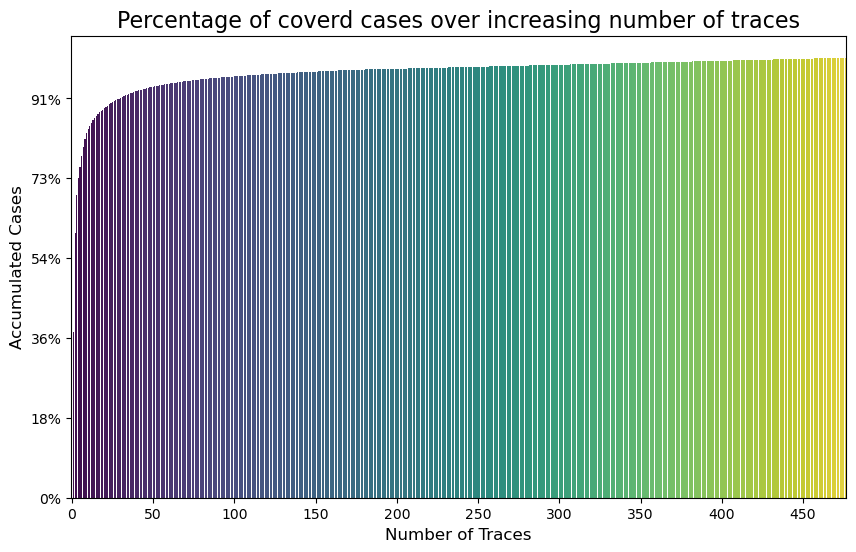

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=variants_df, x=variants_df.index, y='Accumulated', palette='viridis')


# Add titles and labels
plt.title('Percentage of coverd cases over increasing number of traces', fontsize=16)
plt.xlabel('Number of Traces', fontsize=12)
plt.ylabel('Accumulated Cases', fontsize=12)

# Convert y-axis to percentage
max_accumulated = variants_df['Accumulated'].max()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{(y / max_accumulated) * 100:.0f}%'))

# Show the plot
# plt.tight_layout()
plt.xticks(ticks=range(0, len(variants_df), 50))
#plt.yticks(ticks=range(0, len(variants_df), 50))
plt.show()

(h) (1.5 points) Answer the following questions:
- What is the minimum number of variants you need to cover 85 % of cases?
- How high is the percentage of cases covered by the two most frequent variants?
- How many variants represent fewer than 10 cases?

In [13]:
cases_to_cover = num_cases * 0.85
display(f"{num_cases=}")
display(f"{cases_to_cover=}")

index = variants_df[variants_df['Accumulated'] > cases_to_cover].index.min() # + 1


display(index)
display(variants_df.loc[[index]])

'num_cases=11021'

'cases_to_cover=9367.85'

12

,Traces,Occurences,Accumulated
12,"(Create Offer, Created, Sent (online only), Re...",76,9395


percentage of cases covered by the 2 most frequent variants

In [14]:
# percentage of cases covered by the 2 most frequent variants
display(variants_df["Accumulated"][2])
display(variants_df["Accumulated"][2]/ num_cases * 100)

6641

60.25768986480355

number of variants representing fewer than 10 cases

In [15]:
# Find the number of variants that cover less then 10 cases
display(len(variants_df[variants_df["Occurences"] < 10]) - 1) # -1 because of the added row above
display(variants_df[variants_df["Occurences"] < 10])

427

,Traces,Occurences,Accumulated
0,(),0,0
50,"(Create Offer, Created, Create Offer, Created,...",9,10295
51,"(Create Offer, Created, Refused)",9,10304
52,"(Create Offer, Created, Create Offer, Created,...",9,10313
53,"(Create Offer, Created, Sent (mail and online)...",9,10322
...,...,...,...
472,"(Create Offer, Created, Cancelled, Create Offe...",1,11017
473,"(Create Offer, Created, Sent (mail and online)...",1,11018
474,"(Create Offer, Created, Sent (online only), Ca...",1,11019
475,"(Create Offer, Created, Create Offer, Created,...",1,11020


## Process Models

Your previous process model describes all behavior seen in the data; resulting in a very
large and hard to read process model. Now you want to create a simpler model that only
shows the most frequent behavior.

### Five Most Frequent Variants

(i) (2.5 points) Provide a Petri net model obtained from applying the Inductive Miner
using an event log only containing the traces of the five most frequent variants. Do
not actively set any parameters for the Inductive Miner—leave them at their default
values and just pass the filtered event log as input. How is this model’s token-based
replay fitness (log_fitness) on the full event log?

In [16]:
# event log with only 5 most frequent variants

# Filtering the log by the top 5 traces
filtered_dataframe = pm4py.filter_variants_top_k(
    log_obj,
    5,
    activity_key='concept:name',
    timestamp_key='time:timestamp',
    case_id_key='case:concept:name'
)
display(filtered_dataframe)

,concept:name,time:timestamp,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID,case:LoanGoal,case:ApplicationType,case:concept:name,case:RequestedAmount,@@index,@@case_index
0,Create Offer,2016-04-04 16:12:03.476000+00:00,0.0,111.0,True,500.00,False,0.0,45000.0,NaN,Car,New credit,Application_1000311556,45000.0,0,0
1,Created,2016-04-04 16:12:04.732000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_2032690166,Car,New credit,Application_1000311556,45000.0,1,0
2,Sent (mail and online),2016-04-04 16:15:45.527000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_2032690166,Car,New credit,Application_1000311556,45000.0,2,0
3,Cancelled,2016-05-05 06:00:48.950000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_2032690166,Car,New credit,Application_1000311556,45000.0,3,0
4,Create Offer,2016-02-26 14:00:45.194000+00:00,577.0,120.0,False,56.30,True,824.0,5000.0,NaN,Existing loan takeover,New credit,Application_100034150,5000.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68276,Create Offer,2016-08-18 15:18:28.387000+00:00,20000.0,85.0,True,273.49,True,1064.0,20000.0,NaN,Existing loan takeover,New credit,Application_999487618,20000.0,68276,11018
68277,Created,2016-08-18 15:18:29.038000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_211963320,Existing loan takeover,New credit,Application_999487618,20000.0,68277,11018
68278,Sent (mail and online),2016-08-18 15:22:44.940000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_211963320,Existing loan takeover,New credit,Application_999487618,20000.0,68278,11018
68279,Returned,2016-08-25 08:53:07.648000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_211963320,Existing loan takeover,New credit,Application_999487618,20000.0,68279,11018


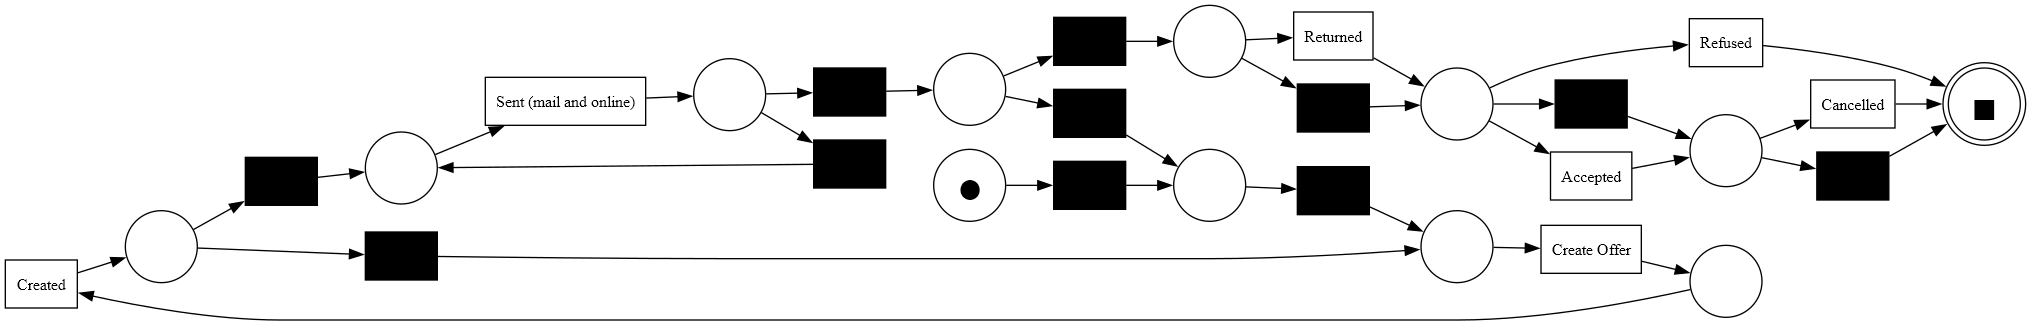

In [17]:
# process model of the five most frequent variants
# The net, initial marking, and final marking
net, im, fm = pm4py.discover_petri_net_inductive(filtered_dataframe)

# Visualize the Petri net
pm4py.view_petri_net(petri_net=net, initial_marking=im, final_marking=fm) 

In [18]:
# fitness of process model
fitness_measures = pm4py.conformance.fitness_token_based_replay(log=log_obj, petri_net=net, initial_marking=im, final_marking=fm)
display(fitness_measures)

replaying log with TBR, completed traces ::   0%|          | 0/476 [00:00<?, ?it/s]

{'perc_fit_traces': 77.8332274748208,
 'average_trace_fitness': 0.9828988471844935,
 'log_fitness': 0.9769116889804326,
 'percentage_of_fitting_traces': 77.8332274748208}

Model fitness per case

(j) (1 point) Create a histogram of the individual trace fitness values as reported by the
conformance diagnostics (for token-based replay). Use the bins provided in the Jupyter
notebook. Make sure to label your axes and provide a title for the plot.

In [19]:
# histogram of model fitness
bins = np.arange(0, 1.02, 0.02)

token_replay_result =  pm4py.conformance_diagnostics_token_based_replay(log=log_obj, petri_net=net, initial_marking=im, final_marking=fm)
fitness_df = pd.DataFrame(token_replay_result, columns=token_replay_result[0].keys())
display(fitness_df.head())


replaying log with TBR, completed traces ::   0%|          | 0/476 [00:00<?, ?it/s]

,trace_is_fit,trace_fitness,activated_transitions,reached_marking,enabled_transitions_in_marking,transitions_with_problems,missing_tokens,consumed_tokens,remaining_tokens,produced_tokens
0,True,1.0,"[(tau_1, None), (init_loop_4, None), (15568a48...",{sink: 1},{},[],0,12,0,12
1,True,1.0,"[(tau_1, None), (init_loop_4, None), (15568a48...",{sink: 1},{},[],0,12,0,12
2,True,1.0,"[(tau_1, None), (init_loop_4, None), (15568a48...",{sink: 1},{},[],0,12,0,12
3,True,1.0,"[(tau_1, None), (init_loop_4, None), (15568a48...",{sink: 1},{},[],0,11,0,11
4,True,1.0,"[(tau_1, None), (init_loop_4, None), (15568a48...",{sink: 1},{},[],0,11,0,11


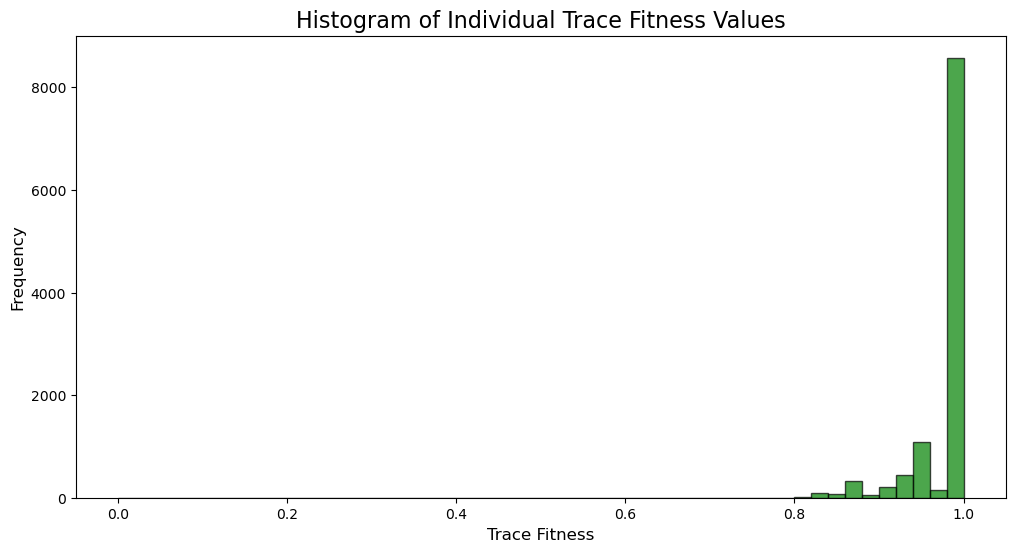

In [20]:
# Extract the trace fitness values
trace_fitness_values = fitness_df['trace_fitness']

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(trace_fitness_values, bins=bins, color='green', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of Individual Trace Fitness Values', fontsize=16)
plt.xlabel('Trace Fitness', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

## Performance Analysis (Throughput Times)

- Only consider the 35 most frequent variants
- Throughput time of a case: case duration


In [21]:
# event log with 35 most frequent variants
top_35_variants = variants_df.iloc[1:36]["Traces"].to_list()
display(top_35_variants)

[('Create Offer', 'Created', 'Sent (mail and online)', 'Returned', 'Accepted'),
 ('Create Offer', 'Created', 'Sent (mail and online)', 'Cancelled'),
 ('Create Offer', 'Created', 'Sent (mail and online)', 'Returned', 'Refused'),
 ('Create Offer',
  'Created',
  'Sent (mail and online)',
  'Create Offer',
  'Created',
  'Sent (mail and online)',
  'Returned',
  'Accepted',
  'Cancelled'),
 ('Create Offer',
  'Created',
  'Create Offer',
  'Created',
  'Sent (mail and online)',
  'Sent (mail and online)',
  'Returned',
  'Accepted',
  'Cancelled'),
 ('Create Offer',
  'Created',
  'Create Offer',
  'Created',
  'Sent (mail and online)',
  'Sent (mail and online)',
  'Cancelled',
  'Cancelled'),
 ('Create Offer',
  'Created',
  'Sent (mail and online)',
  'Create Offer',
  'Created',
  'Sent (mail and online)',
  'Cancelled',
  'Cancelled'),
 ('Create Offer',
  'Created',
  'Sent (mail and online)',
  'Returned',
  'Cancelled'),
 ('Create Offer',
  'Created',
  'Sent (mail and online)',
  

In [22]:
# Create list to store the results
variants = []

# determine required information per variant (mean throughput time, number of offers)
for variant in top_35_variants:
    # Filter the log by the variant
    variant_log = pm4py.filter_variants(log_obj, [variant])
    # Get the throughput times of the variants
    throughput_times = pm4py.get_all_case_durations(variant_log)
    # Calculate mean trouphput time an the cases covered by the top 35 variants
    average_case_duration = np.mean(throughput_times) / (60 * 60 * 24)
    cases_covered = len(variant_log["case:concept:name"].unique())
    variants.append({"Traces": variant, "Mean Throughput Time": average_case_duration, "Cases Covered": int(cases_covered)})
    
# Create a df with the top 35 variants
df = pd.DataFrame(variants)
df["Accumulated"] = df["Cases Covered"].cumsum()
display(df)


,Traces,Mean Throughput Time,Cases Covered,Accumulated
0,"(Create Offer, Created, Sent (mail and online)...",14.760714,4150,4150
1,"(Create Offer, Created, Sent (mail and online)...",27.222963,2491,6641
2,"(Create Offer, Created, Sent (mail and online)...",14.380607,941,7582
3,"(Create Offer, Created, Sent (mail and online)...",21.483289,419,8001
4,"(Create Offer, Created, Create Offer, Created,...",16.435542,292,8293
5,"(Create Offer, Created, Create Offer, Created,...",27.530539,273,8566
6,"(Create Offer, Created, Sent (mail and online)...",35.872803,226,8792
7,"(Create Offer, Created, Sent (mail and online)...",26.902004,194,8986
8,"(Create Offer, Created, Sent (mail and online)...",20.041637,157,9143
9,"(Create Offer, Created, Sent (mail and online)...",25.272647,98,9241


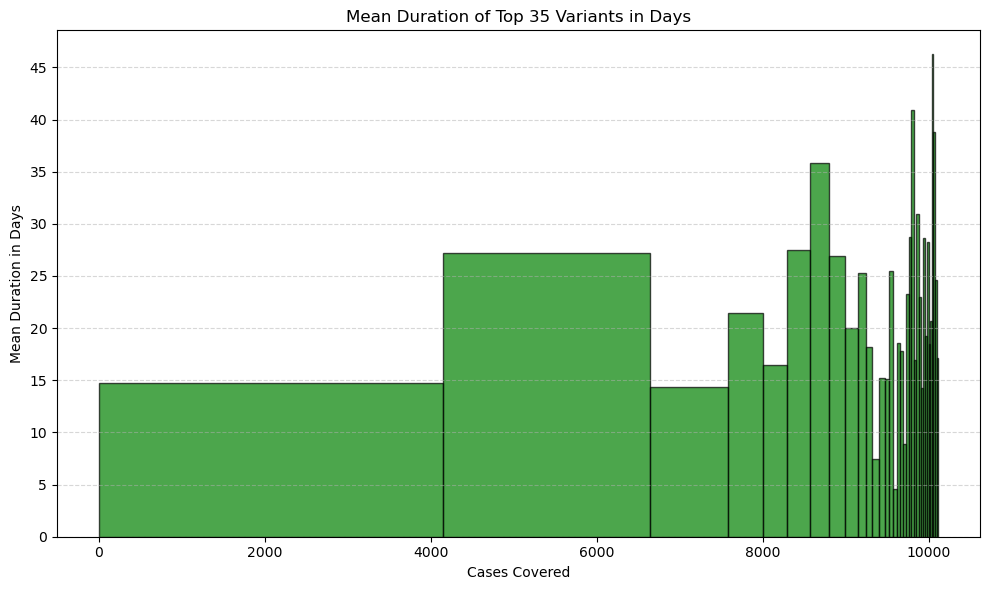

In [23]:
# create bar chart with throughput time per variant.

cases_covered = df['Accumulated'].max()

plt.figure(figsize=(10, 6))

height = df['Mean Throughput Time']
width = df['Cases Covered']
x_pos = df['Accumulated'] - (df['Cases Covered'] / 2)
plt.xlabel('Cases Covered')
plt.ylabel('Mean Duration in Days')
plt.title('Mean Duration of Top 35 Variants in Days')
plt.bar(x_pos, height, width=width, align='center', alpha=0.7, edgecolor='black', color='green')
# plt.xticks(ticks=np.arange(0, 10000, step=1000))
plt.yticks(ticks=np.arange(0, 46, step=5))

# Show background grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [24]:
display(f"The mean throughput time of the two most frequent variants is {"{:.2f}".format(df['Mean Throughput Time'][1])} and {"{:.2f}".format(df['Mean Throughput Time'][2])} days.")


'The mean throughput time of the two most frequent variants is 27.22 and 14.38 days.'

### Throughput time and number of offers

(m) (1.5 points) Considering the mean throughput times per variant (only considering the
35 most frequent variants), you suspect the number of offers created per variant might
have an impact on the throughput time. Create a suitable boxplot showing the mean
throughput time (y-axis) per variant with regard to the number of offers made per
variant (x-axis). Make sure to label your axes and provide a title for the plot. Does
the plot show an indication on how the number of offers a customer is presented with
affects the throughput time?

In [25]:
display(df['Traces'][1][0])
# Count offers per variant
offer_counts = []
for variant in df['Traces']:
    offer_counts.append(variant.count("Created"))

df['Num Offers'] = offer_counts
display(df)

'Create Offer'

,Traces,Mean Throughput Time,Cases Covered,Accumulated,Num Offers
0,"(Create Offer, Created, Sent (mail and online)...",14.760714,4150,4150,1
1,"(Create Offer, Created, Sent (mail and online)...",27.222963,2491,6641,1
2,"(Create Offer, Created, Sent (mail and online)...",14.380607,941,7582,1
3,"(Create Offer, Created, Sent (mail and online)...",21.483289,419,8001,2
4,"(Create Offer, Created, Create Offer, Created,...",16.435542,292,8293,2
5,"(Create Offer, Created, Create Offer, Created,...",27.530539,273,8566,2
6,"(Create Offer, Created, Sent (mail and online)...",35.872803,226,8792,2
7,"(Create Offer, Created, Sent (mail and online)...",26.902004,194,8986,1
8,"(Create Offer, Created, Sent (mail and online)...",20.041637,157,9143,2
9,"(Create Offer, Created, Sent (mail and online)...",25.272647,98,9241,2


C:\Users\Joost\AppData\Local\Temp\ipykernel_32256\2209446898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Num Offers', y='Mean Throughput Time', palette='viridis')


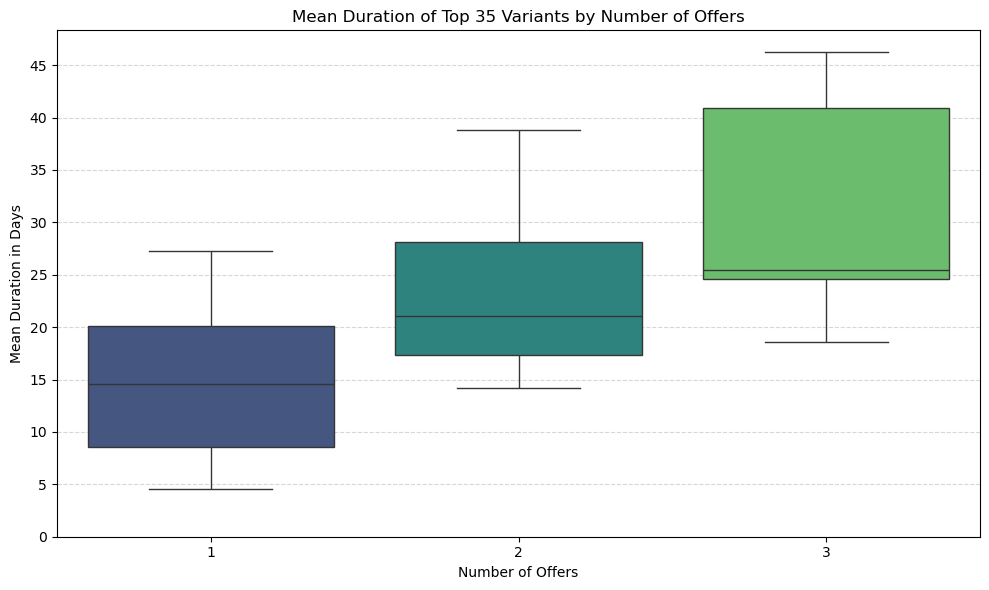

In [26]:
# box plot of throughput time vs. number of offers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Num Offers', y='Mean Throughput Time', palette='viridis')  
plt.title('Mean Duration of Top 35 Variants by Number of Offers')
plt.xlabel('Number of Offers')
plt.ylabel('Mean Duration in Days')
plt.xticks(ticks=np.arange(0, df["Num Offers"].max(), step=1))
plt.yticks(ticks=np.arange(0, 46, step=5))
# Show background grid
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()